In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
class KPZ:
    def __init__(self,n, T=1):
        self.n = n 
        self.matrix = np.random.normal(size=(n,n))
        self.Z_matrix = np.zeros((n,n))
        self.T = T
    
    def Z(self,x,y):
        """
        Return the partition function for a polymer at point (x,y) at a heat bath T.
        """
        if x == 0 and y == 0:
            self.Z_matrix[x,y] = np.exp(-self.matrix[x,y])
        elif x == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y]) 
        elif y == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y])*np.exp(-self.matrix[x,y])
        else:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y] + self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y])
    
    def run(self):
        for i in range(self.n):
            for j in range(self.n):
                self.Z(i,j)
    

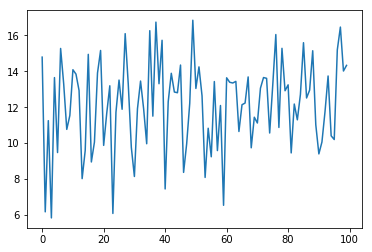

In [125]:
mean = []
temp = np.arange(0,100)
for t in temp:
    Sol = KPZ(10, T = t)
    Sol.run()
    mean.append(np.mean(Sol.Z_matrix))
    
plt.plot(temp,np.log(mean))

In [115]:
print('Z_Matrix:')
print('Mean: ',np.mean(Sol.Z_matrix))
print('Standard Deviation: ', np.std(Sol.Z_matrix))
print('Maximum Value: ',np.max(Sol.Z_matrix))

Z_Matrix:
Mean:  1054.39792949608
Standard Deviation:  4581.440232587867
Maximum Value:  31025.95813940297


In [101]:
print('Matrix:')
print('Mean: ',np.mean(Sol.matrix))
print('Standard Deviation: ', np.std(Sol.matrix))
print('Maximum Value: ',np.max(Sol.matrix))

Matrix:
Mean:  -0.08970050550935342
Standard Deviation:  0.920302670116594
Maximum Value:  1.8520464650329829
